In [1]:
import json
import matplotlib.pyplot as plt

# ✅ Absolute full path
stats_path = '/home/s25vargason1/aamber/stats.jsonl'


# Load data from the file
data = []
with open(stats_path, 'r') as f:
    for line in f:
        data.append(json.loads(line))

print(f"✅ Loaded {len(data)} training ticks")


✅ Loaded 415 training ticks


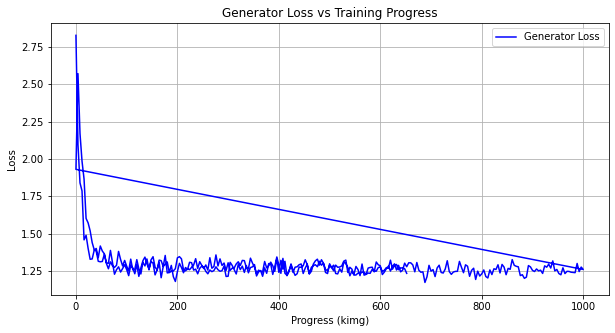

In [2]:
# Extract values
kimgs = []
g_loss = []

for tick in data:
    if 'Progress/kimg' in tick and 'Loss/G/loss' in tick:
        kimgs.append(tick['Progress/kimg']['mean'])
        g_loss.append(tick['Loss/G/loss']['mean'])

# Plot Generator Loss
plt.figure(figsize=(10, 5))
plt.plot(kimgs, g_loss, label='Generator Loss', color='blue')
plt.xlabel("Progress (kimg)")
plt.ylabel("Loss")
plt.title("Generator Loss vs Training Progress")
plt.grid(True)
plt.legend()
plt.show()


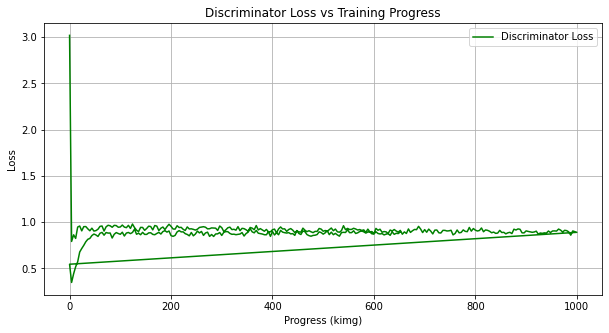

In [3]:
# Extract Discriminator Loss
d_loss = []

for tick in data:
    if 'Progress/kimg' in tick and 'Loss/D/loss' in tick:
        d_loss.append(tick['Loss/D/loss']['mean'])

# Plot Discriminator Loss
plt.figure(figsize=(10, 5))
plt.plot(kimgs, d_loss, label='Discriminator Loss', color='green')
plt.xlabel("Progress (kimg)")
plt.ylabel("Loss")
plt.title("Discriminator Loss vs Training Progress")
plt.grid(True)
plt.legend()
plt.show()


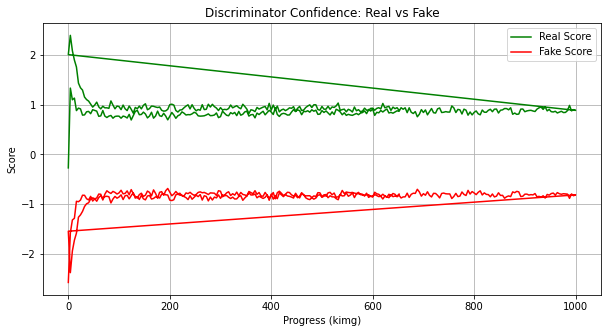

In [4]:
real_scores = []
fake_scores = []

for tick in data:
    if 'Loss/scores/real' in tick and 'Loss/scores/fake' in tick:
        real_scores.append(tick['Loss/scores/real']['mean'])
        fake_scores.append(tick['Loss/scores/fake']['mean'])

# Plot confidence scores
plt.figure(figsize=(10, 5))
plt.plot(kimgs, real_scores, label='Real Score', color='green')
plt.plot(kimgs, fake_scores, label='Fake Score', color='red')
plt.xlabel("Progress (kimg)")
plt.ylabel("Score")
plt.title("Discriminator Confidence: Real vs Fake")
plt.grid(True)
plt.legend()
plt.show()


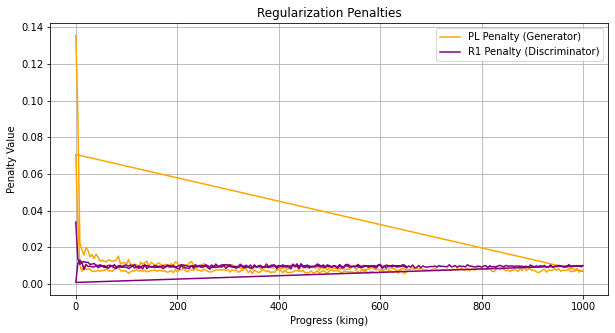

In [5]:
# Plot PL Penalty and R1 Penalty
pl_penalty = []
r1_penalty = []
kimgs_plr1 = []

for tick in data:
    if 'Progress/kimg' in tick:
        kimgs_plr1.append(tick['Progress/kimg']['mean'])
        pl_penalty.append(tick.get('Loss/pl_penalty', {}).get('mean', 0))
        r1_penalty.append(tick.get('Loss/r1_penalty', {}).get('mean', 0))

plt.figure(figsize=(10, 5))
plt.plot(kimgs_plr1, pl_penalty, label='PL Penalty (Generator)', color='orange')
plt.plot(kimgs_plr1, r1_penalty, label='R1 Penalty (Discriminator)', color='purple')
plt.xlabel("Progress (kimg)")
plt.ylabel("Penalty Value")
plt.title("Regularization Penalties")
plt.grid(True)
plt.legend()
plt.show()


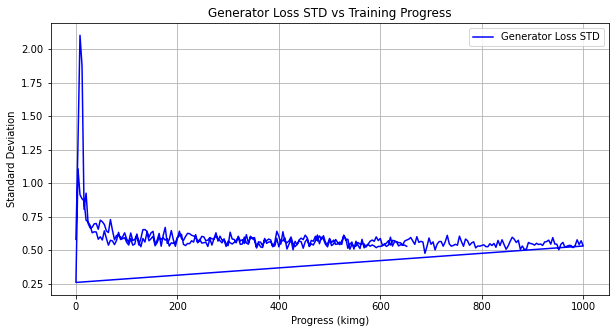

In [6]:
# Generator Loss Standard Deviation
g_loss_std = []
kimgs_std = []

for tick in data:
    if 'Progress/kimg' in tick and 'Loss/G/loss' in tick:
        kimgs_std.append(tick['Progress/kimg']['mean'])
        g_loss_std.append(tick['Loss/G/loss'].get('std', 0))

plt.figure(figsize=(10, 5))
plt.plot(kimgs_std, g_loss_std, label='Generator Loss STD', color='blue')
plt.xlabel("Progress (kimg)")
plt.ylabel("Standard Deviation")
plt.title("Generator Loss STD vs Training Progress")
plt.grid(True)
plt.legend()
plt.show()


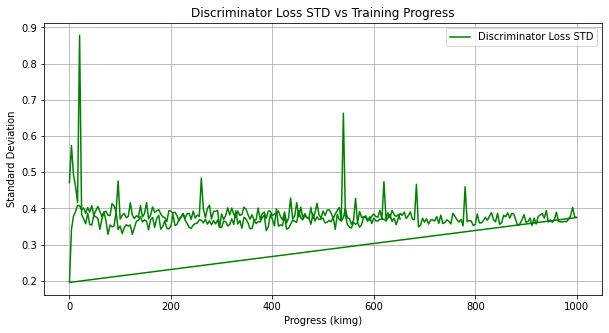

In [7]:
# Discriminator Loss Standard Deviation
d_loss_std = []

for tick in data:
    if 'Progress/kimg' in tick and 'Loss/D/loss' in tick:
        d_loss_std.append(tick['Loss/D/loss'].get('std', 0))

plt.figure(figsize=(10, 5))
plt.plot(kimgs_std, d_loss_std, label='Discriminator Loss STD', color='green')
plt.xlabel("Progress (kimg)")
plt.ylabel("Standard Deviation")
plt.title("Discriminator Loss STD vs Training Progress")
plt.grid(True)
plt.legend()
plt.show()


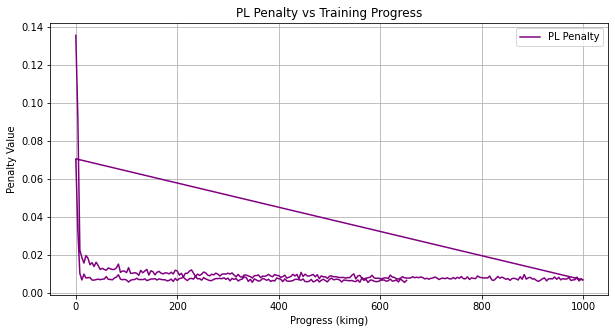

In [8]:
# PL Penalty alone
pl_penalty = []

for tick in data:
    if 'Progress/kimg' in tick:
        pl_penalty.append(tick.get('Loss/pl_penalty', {}).get('mean', 0))

plt.figure(figsize=(10, 5))
plt.plot(kimgs_std, pl_penalty, label='PL Penalty', color='purple')
plt.xlabel("Progress (kimg)")
plt.ylabel("Penalty Value")
plt.title("PL Penalty vs Training Progress")
plt.grid(True)
plt.legend()
plt.show()


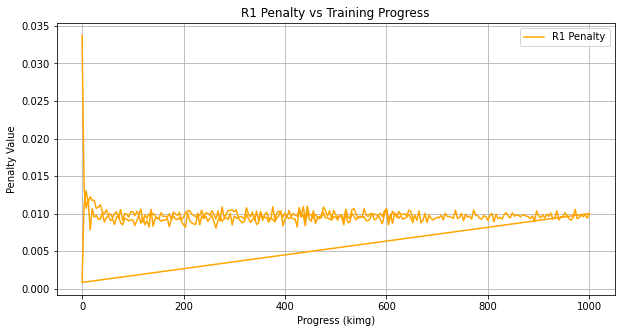

In [9]:
# R1 Penalty alone
r1_penalty = []

for tick in data:
    if 'Progress/kimg' in tick:
        r1_penalty.append(tick.get('Loss/r1_penalty', {}).get('mean', 0))

plt.figure(figsize=(10, 5))
plt.plot(kimgs_std, r1_penalty, label='R1 Penalty', color='orange')
plt.xlabel("Progress (kimg)")
plt.ylabel("Penalty Value")
plt.title("R1 Penalty vs Training Progress")
plt.grid(True)
plt.legend()
plt.show()


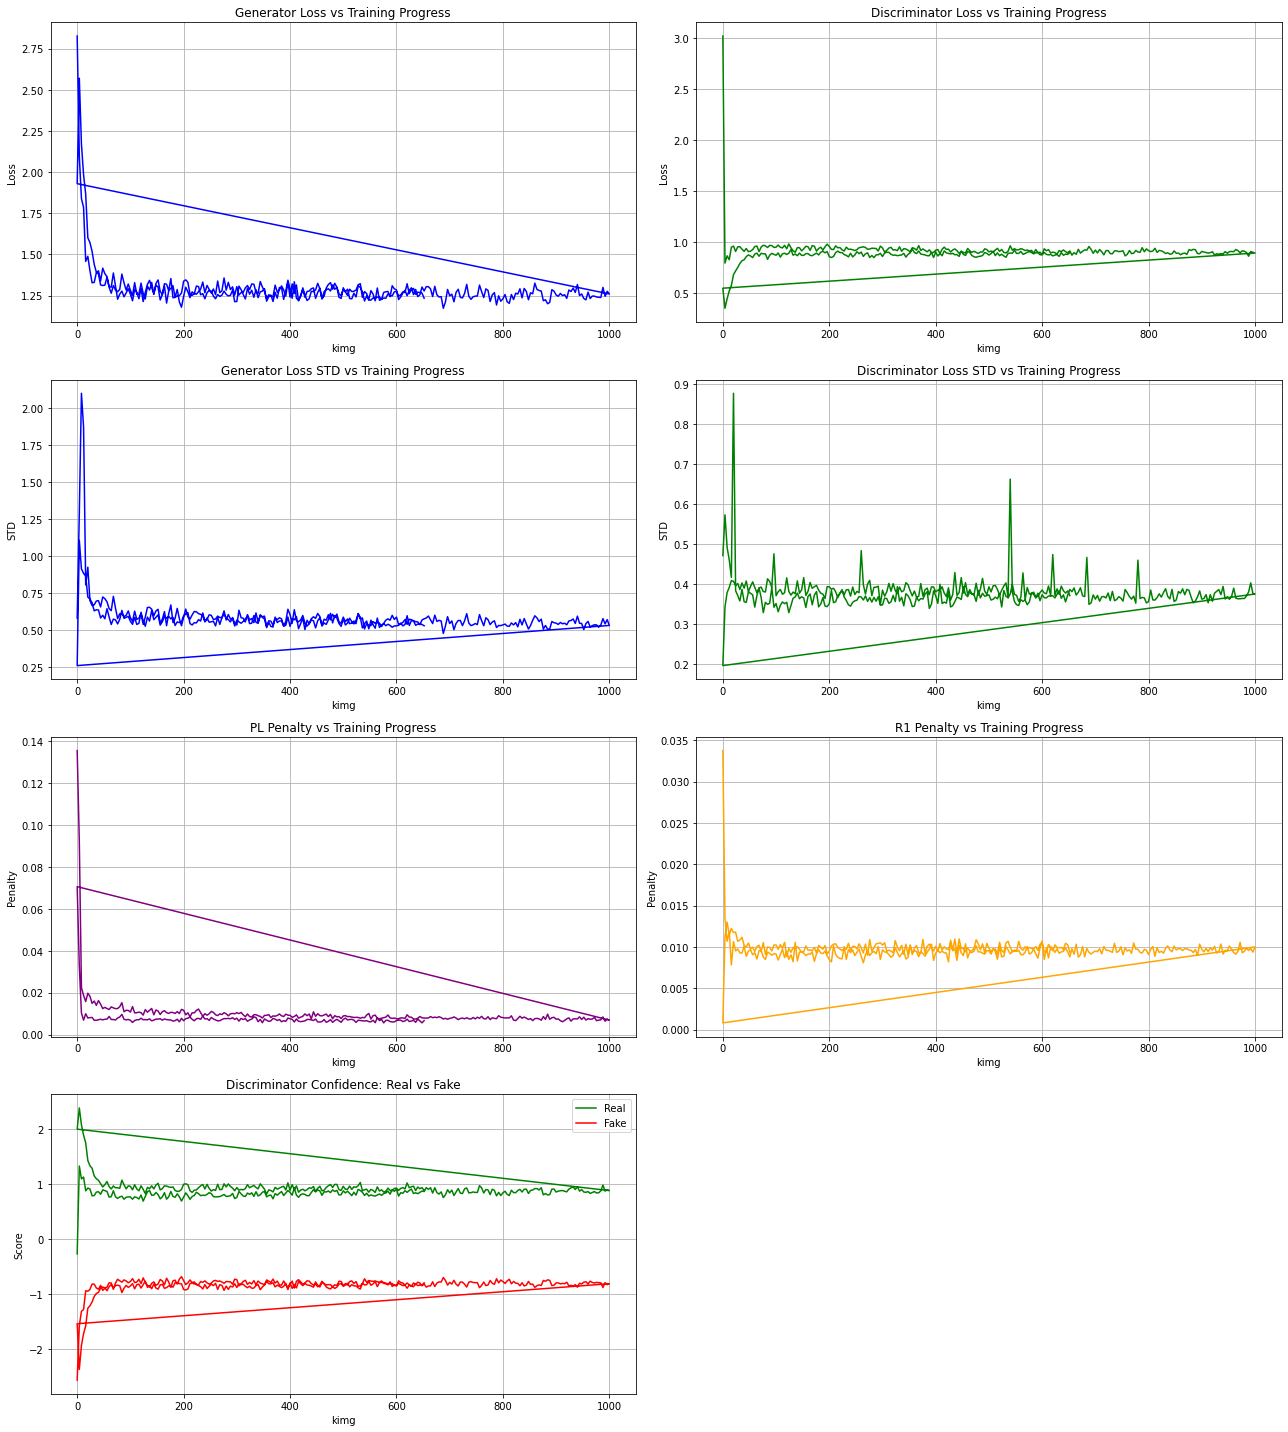

In [10]:
import matplotlib.pyplot as plt

# Prepare the figure
fig, axs = plt.subplots(4, 2, figsize=(18, 20))  # 4 rows, 2 columns

# 1. Generator Loss
axs[0, 0].plot(kimgs, g_loss, color='blue')
axs[0, 0].set_title("Generator Loss vs Training Progress")
axs[0, 0].set_xlabel("kimg")
axs[0, 0].set_ylabel("Loss")
axs[0, 0].grid(True)

# 2. Discriminator Loss
axs[0, 1].plot(kimgs, d_loss, color='green')
axs[0, 1].set_title("Discriminator Loss vs Training Progress")
axs[0, 1].set_xlabel("kimg")
axs[0, 1].set_ylabel("Loss")
axs[0, 1].grid(True)

# 3. Generator Loss STD
axs[1, 0].plot(kimgs, g_loss_std, color='blue')
axs[1, 0].set_title("Generator Loss STD vs Training Progress")
axs[1, 0].set_xlabel("kimg")
axs[1, 0].set_ylabel("STD")
axs[1, 0].grid(True)

# 4. Discriminator Loss STD
axs[1, 1].plot(kimgs, d_loss_std, color='green')
axs[1, 1].set_title("Discriminator Loss STD vs Training Progress")
axs[1, 1].set_xlabel("kimg")
axs[1, 1].set_ylabel("STD")
axs[1, 1].grid(True)

# 5. PL Penalty
axs[2, 0].plot(kimgs, pl_penalty, color='purple')
axs[2, 0].set_title("PL Penalty vs Training Progress")
axs[2, 0].set_xlabel("kimg")
axs[2, 0].set_ylabel("Penalty")
axs[2, 0].grid(True)

# 6. R1 Penalty
axs[2, 1].plot(kimgs, r1_penalty, color='orange')
axs[2, 1].set_title("R1 Penalty vs Training Progress")
axs[2, 1].set_xlabel("kimg")
axs[2, 1].set_ylabel("Penalty")
axs[2, 1].grid(True)

# 7. Real Score
axs[3, 0].plot(kimgs, real_scores, label='Real', color='green')
axs[3, 0].plot(kimgs, fake_scores, label='Fake', color='red')
axs[3, 0].set_title("Discriminator Confidence: Real vs Fake")
axs[3, 0].set_xlabel("kimg")
axs[3, 0].set_ylabel("Score")
axs[3, 0].legend()
axs[3, 0].grid(True)

# Hide empty cell (bottom-right)
fig.delaxes(axs[3, 1])

# Adjust layout
plt.tight_layout()
plt.show()


In [11]:
import os

# Create a folder to save the plots
os.makedirs('plots4', exist_ok=True)
print("✅ Folder 'plots4/' is ready!")


✅ Folder 'plots4/' is ready!


In [ ]:
# Save Generator Loss
plt.figure(figsize=(10, 5))
plt.plot(kimgs, g_loss, color='blue')
plt.title("Generator Loss vs Training Progress")
plt.xlabel("Progress (kimg)")
plt.ylabel("Loss")
plt.grid(True)
plt.savefig('plots4/generator_loss.png')
plt.close()

# Save Discriminator Loss
plt.figure(figsize=(10, 5))
plt.plot(kimgs, d_loss, color='green')
plt.title("Discriminator Loss vs Training Progress")
plt.xlabel("Progress (kimg)")
plt.ylabel("Loss")
plt.grid(True)
plt.savefig('plots4/discriminator_loss.png')
plt.close()

# Save Generator Loss STD
plt.figure(figsize=(10, 5))
plt.plot(kimgs, g_loss_std, color='blue')
plt.title("Generator Loss STD vs Training Progress")
plt.xlabel("Progress (kimg)")
plt.ylabel("STD")
plt.grid(True)
plt.savefig('plots4/generator_loss_std.png')
plt.close()

# Save Discriminator Loss STD
plt.figure(figsize=(10, 5))
plt.plot(kimgs, d_loss_std, color='green')
plt.title("Discriminator Loss STD vs Training Progress")
plt.xlabel("Progress (kimg)")
plt.ylabel("STD")
plt.grid(True)
plt.savefig('plots4/discriminator_loss_std.png')
plt.close()

# Save PL Penalty
plt.figure(figsize=(10, 5))
plt.plot(kimgs, pl_penalty, color='purple')
plt.title("PL Penalty vs Training Progress")
plt.xlabel("Progress (kimg)")
plt.ylabel("Penalty")
plt.grid(True)
plt.savefig('plots4/pl_penalty.png')
plt.close()

# Save R1 Penalty
plt.figure(figsize=(10, 5))
plt.plot(kimgs, r1_penalty, color='orange')
plt.title("R1 Penalty vs Training Progress")
plt.xlabel("Progress (kimg)")
plt.ylabel("Penalty")
plt.grid(True)
plt.savefig('plots4/r1_penalty.png')
plt.close()

# Save Real vs Fake Scores
plt.figure(figsize=(10, 5))
plt.plot(kimgs, real_scores, label='Real', color='green')
plt.plot(kimgs, fake_scores, label='Fake', color='red')
plt.title("Discriminator Confidence: Real vs Fake")
plt.xlabel("Progress (kimg)")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.savefig('plots4/real_vs_fake_scores.png')
plt.close()
